In [ ]:
import torch
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
pip install -qq transformers

     |████████████████████████████████| 3.1 MB 7.7 MB/s 
     |████████████████████████████████| 596 kB 72.9 MB/s 
     |████████████████████████████████| 3.3 MB 58.5 MB/s 
     |████████████████████████████████| 895 kB 63.5 MB/s 
     |████████████████████████████████| 59 kB 8.6 MB/s 


In [ ]:
#conda install pytorch torchvision -c pytorch
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.8 kB/s 
     |████████████████████████████████| 8.8 MB 23.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tweet100.csv to Tweet100.csv


In [ ]:
#df = pd.read_csv("/Users/sravanisomepalli/Downloads/Tweets.csv",header = None)
import io
df = pd.read_csv('Tweet100.csv',encoding='latin-1')

In [ ]:
df2 = pd.read_csv('Tweet100.csv',encoding='latin-1')

In [ ]:
#df.columns=['Sentiment', 'id', 'Date', 'Query', 'User', 'Tweet']
df.head()

,Unnamed: 0,Sentiment,id,Date,Query,User,Tweet
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.iloc[: , 1:]
df2 = df2.iloc[: , 1:]

In [ ]:
df.head()

,Sentiment,id,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.Sentiment.unique()

array([0, 4])

In [ ]:
#df = df.drop(df.index[10000:50000])
df = df.drop(df.index[25000:50000])

In [ ]:
#df = df.drop(df.index[20000:60000])
df = df.drop(df.index[50000:75000])

The Sentiment is changed into 0,1 from 0,4

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Sentiment"] = label_encoder.fit_transform(df["Sentiment"])

Shape of the data

In [ ]:
print("Shape of data=>",df.shape)

Shape of data=> (50000, 6)


Describing the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 74999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  50000 non-null  int64 
 1   id         50000 non-null  int64 
 2   Date       50000 non-null  object
 3   Query      50000 non-null  object
 4   User       50000 non-null  object
 5   Tweet      50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


Checking for NULL values in dataset

In [ ]:
df.isnull().sum()

Sentiment    0
id           0
Date         0
Query        0
User         0
Tweet        0
dtype: int64

No null values

Checking the number of unique users

In [ ]:
df['User'].nunique()

41237

In [ ]:
df['Sentiment'].unique()

array([0, 1])

Checking for the no.of days tweets were done

In [ ]:
df['Date'].nunique()

28429

Checking the date most tweets were done

In [ ]:
df['Date'].mode()

0    Fri Apr 17 21:57:42 PDT 2009
dtype: object

Checking the user who did most tweets

In [ ]:
df['User'].mode()

0    sebby_peek
dtype: object

Top 5 users who did most tweets

In [ ]:
n = 5
df['User'].value_counts()[:n].index.tolist()

['sebby_peek', 'Hollywood_Trey', 'amazingphoebe', 'Scyranth', '4Hours']

Barchart plotting the negative(0) tweets and positive(4) tweets

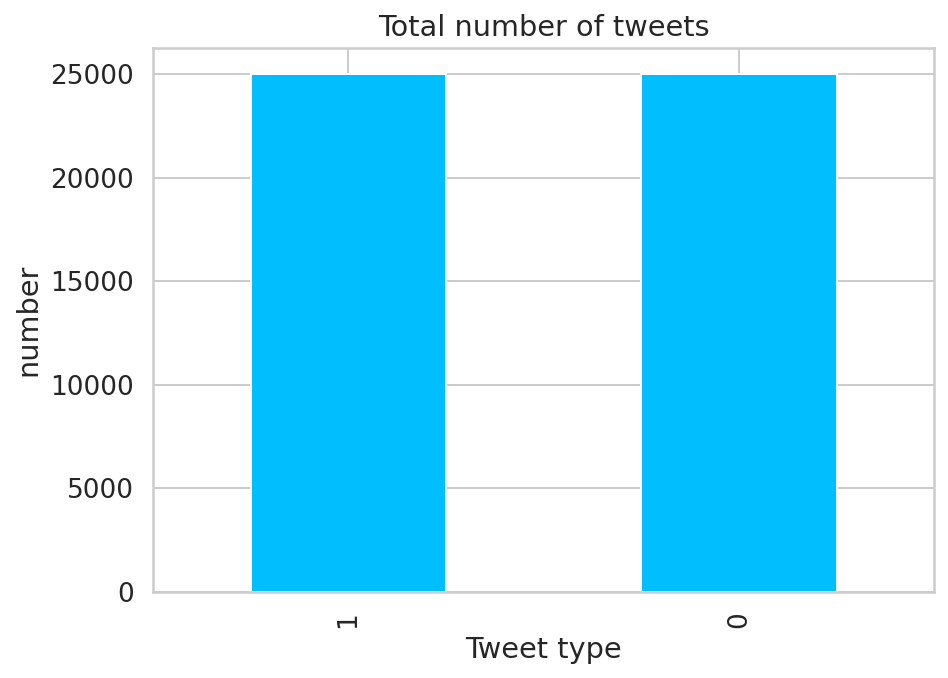

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar',figsize=(7,5));
plt.title('Total number of tweets');
plt.xlabel('Tweet type');
plt.ylabel('number');

In [ ]:
df.head()

,Sentiment,id,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"entity - awww, that's a bummer. you shoulda ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,entity i dived many times for the ball. manage...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"entity no, it's not behaving at all. i'm mad. ..."


In [ ]:
import re

hashtags = re.compile(r"^#\S+|\s#\S+")
mentions = re.compile(r"^@\S+|\s@\S+")
urls = re.compile(r"https?://\S+")

def process_text(text):
    text = re.sub(r'http\S+', '', text)
    text = hashtags.sub(' hashtag', text)
    text = mentions.sub(' entity', text)
    return text.strip().lower()

df['Tweet'] = df.Tweet.apply(process_text)
labels = df.Sentiment.values
text = df.Tweet.values

Dividing the positive tweets to build the word cloud

In [ ]:
df_positive = df[df.Sentiment==1]
df_positive.head()

,Sentiment,id,Date,Query,User,Tweet
50000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,i love entity u guys r the best!!
50001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
50002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"entity thanks for the twitter add, sunisa! i g..."
50003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,being sick can be really cheap when it hurts t...
50004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,entity he has that effect on everyone


In [ ]:
#conda install -c conda-forge wordcloud=1.6.0 
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stop_words = ["entity","quot"] + list(STOPWORDS)

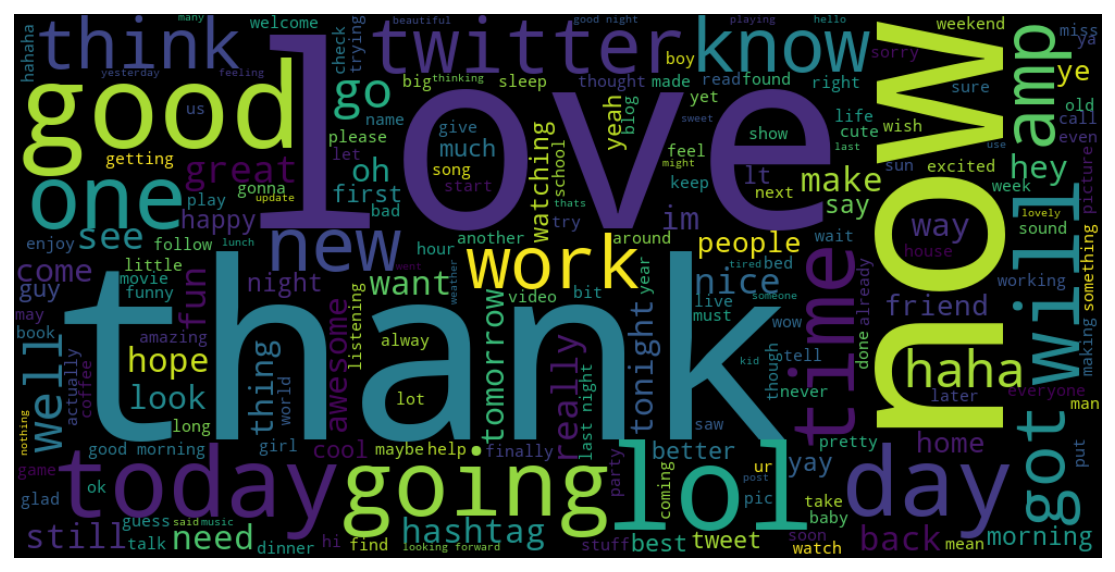

In [ ]:
wcp= (' '.join(df_positive['Tweet']))
wordcloud = WordCloud(stopwords = stop_words,width = 1000, height = 500).generate(wcp)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
display()

Dividing the negative tweets to build the word cloud

In [ ]:
df_negative = df[df.Sentiment==0]
df_negative.head()

,Sentiment,id,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"entity - awww, that's a bummer. you shoulda ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,entity i dived many times for the ball. manage...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"entity no, it's not behaving at all. i'm mad. ..."


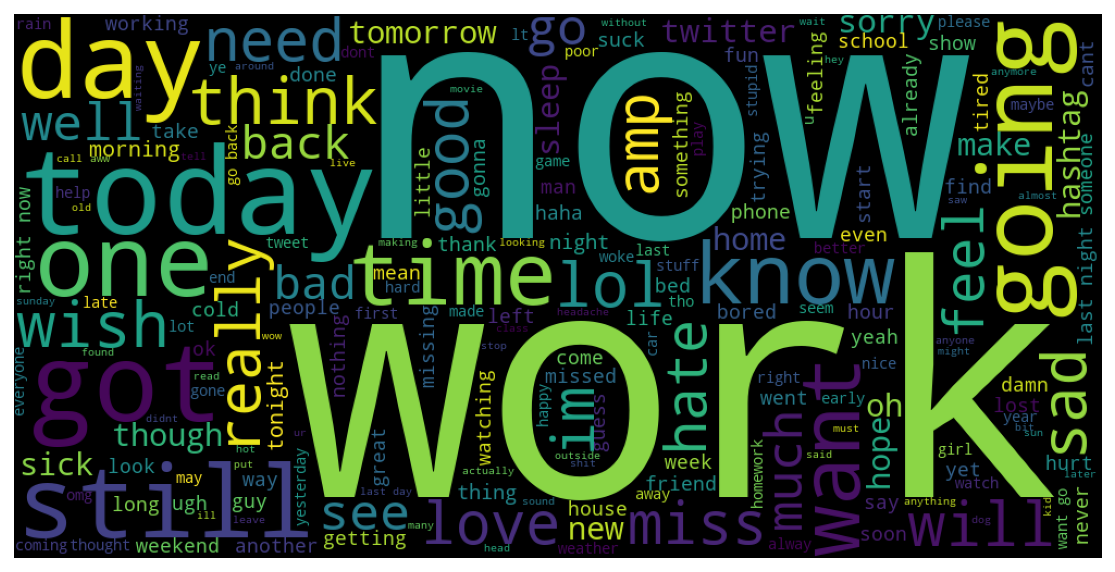

In [ ]:
wcn= (' '.join(df_negative['Tweet']))
wordcloud = WordCloud(stopwords = stop_words,width = 1000, height = 500).generate(wcn)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
display()

Naming the classes we are going to use

In [ ]:
class_names = ['negative', 'positive']

Selecting bert-base-cased pretrained model

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
df.Tweet[10]

"spring break in plain city... it's snowing"

Converting the text to numbers 

In [ ]:
sample_text = df.Tweet[10]

In [ ]:
tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_text}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: spring break in plain city... it's snowing
   Tokens: ['spring', 'break', 'in', 'plain', 'city', '.', '.', '.', 'it', "'", 's', 'snow', '##ing']
Token IDs: [3450, 2549, 1107, 6188, 1331, 119, 119, 119, 1122, 112, 188, 4883, 1158]


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
encoding = tokenizer.encode_plus(
  sample_text,
  max_length=70,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

70


tensor([ 101, 3450, 2549, 1107, 6188, 1331,  119,  119,  119, 1122,  112,  188,
        4883, 1158,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

70


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'spring',
 'break',
 'in',
 'plain',
 'city',
 '.',
 '.',
 '.',
 'it',
 "'",
 's',
 'snow',
 '##ing',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [ ]:
token_lens = []
for txt in df.Tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

In [ ]:
len(token_lens)

50000

In [ ]:
token_lens[0:10]

[34, 33, 23, 13, 35, 7, 5, 33, 11, 9]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


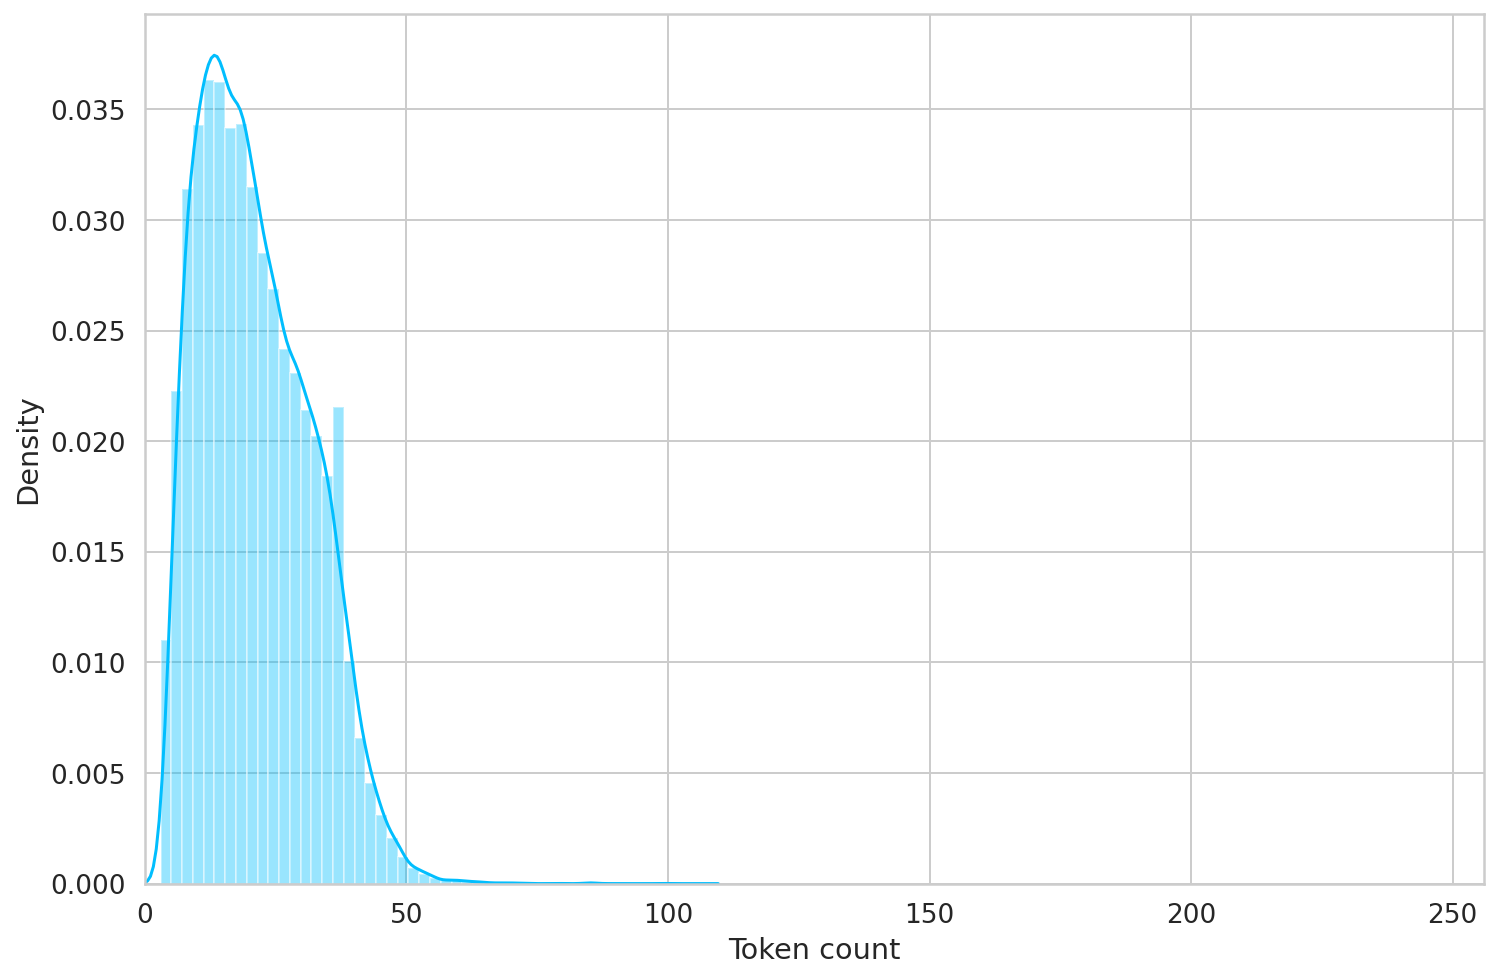

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');
plt.show()
display()

Maximum number of tokens 100

> Indented block




In [ ]:
MAX_LEN = 100

Splitting data into Training, Validation and test sets

In [ ]:
df_train, df_test = train_test_split(
  df,
  test_size=0.1,
  random_state=RANDOM_SEED
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED
)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((45000, 6), (2500, 6), (2500, 6))

Dataloader is used to iterate through the data, manage batches, transform the data

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, tweets, targets, tokenizer, max_len):
        self.tweets = tweets
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.tweets)
    def __getitem__(self, item):
        tweet = str(self.tweets[item])
        target = self.targets[item]
        #print(target)
        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',)  
        #print(encoding)
        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = TweetDataset(
        tweets=df.Tweet.to_numpy(),
        targets=df.Sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0 #no.of CPUs used
    )

In [ ]:
BATCH_SIZE = 64

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
type(train_data_loader)

torch.utils.data.dataloader.DataLoader

In [ ]:
data = next(iter(train_data_loader))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
data.keys()

dict_keys(['tweet_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
data['input_ids'].shape

torch.Size([64, 100])

In [ ]:
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([64, 100])
torch.Size([64])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME,return_dict=False)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([64, 100])
torch.Size([64, 100])


In [ ]:
import torch.nn.functional as F

In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3337, 0.6663],
        [0.3757, 0.6243],
        [0.5589, 0.4411],
        [0.3160, 0.6840],
        [0.7163, 0.2837],
        [0.4472, 0.5528],
        [0.4629, 0.5371],
        [0.6463, 0.3537],
        [0.5782, 0.4218],
        [0.6325, 0.3675],
        [0.5770, 0.4230],
        [0.6393, 0.3607],
        [0.3884, 0.6116],
        [0.4750, 0.5250],
        [0.5518, 0.4482],
        [0.3009, 0.6991],
        [0.4276, 0.5724],
        [0.4513, 0.5487],
        [0.4320, 0.5680],
        [0.6093, 0.3907],
        [0.6163, 0.3837],
        [0.6396, 0.3604],
        [0.6045, 0.3955],
        [0.3379, 0.6621],
        [0.4480, 0.5520],
        [0.2980, 0.7020],
        [0.4447, 0.5553],
        [0.4948, 0.5052],
        [0.7217, 0.2783],
        [0.4113, 0.5887],
        [0.3342, 0.6658],
        [0.3084, 0.6916],
        [0.5796, 0.4204],
        [0.2796, 0.7204],
        [0.3715, 0.6285],
        [0.4382, 0.5618],
        [0.3988, 0.6012],
        [0.4495, 0.5505],
        [0.4

Using the optimizer to reduce the loss function


In [ ]:
EPOCHS = 10
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

Training the Data

In [ ]:
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )
  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Train loss 0.4167840741574764 accuracy 0.8086888888888889
Val   loss 0.3632372707128525 accuracy 0.8388

Epoch 2/10
----------
Train loss 0.2635022141674364 accuracy 0.8921777777777778
Val   loss 0.38248375803232193 accuracy 0.8432000000000001

Epoch 3/10
----------
Train loss 0.16290248947916552 accuracy 0.9384
Val   loss 0.46805646643042564 accuracy 0.8384

Epoch 4/10
----------
Train loss 0.10400453186924676 accuracy 0.9635333333333334
Val   loss 0.5857437692582608 accuracy 0.8356

Epoch 5/10
----------
Train loss 0.07439704651782945 accuracy 0.9762222222222223
Val   loss 0.6992280505597591 accuracy 0.8304

Epoch 6/10
----------
Train loss 0.0578375550709428 accuracy 0.9817777777777779
Val   loss 0.7369212344288826 accuracy 0.8300000000000001

Epoch 7/10
----------
Train loss 0.045090600275216275 accuracy 0.9865333333333334
Val   loss 0.8571939878165722 accuracy 0.8296

Epoch 8/10
----------
Train loss 0.03514857164459913 accuracy 0.9896
Val   loss 0.9323008388280869 accuracy 0.8292

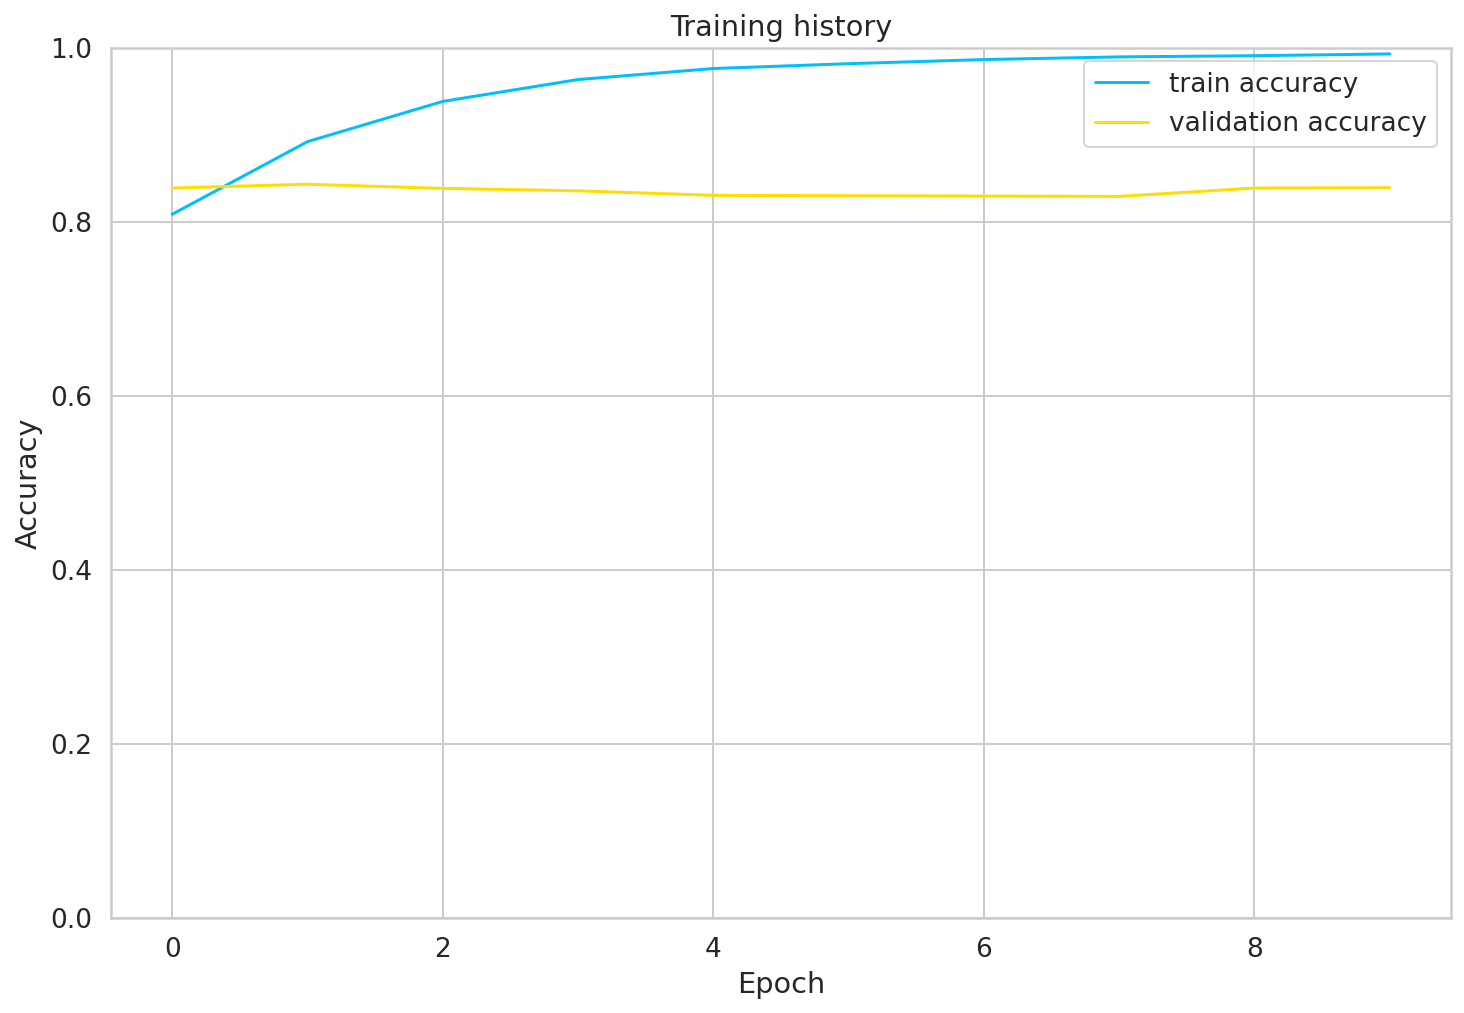

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

Applying the model on the test set

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


0.8312

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  tweet_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      tweets = d["tweet_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      tweet_texts.extend(tweets)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return tweet_texts, predictions, prediction_probs, real_values

In [ ]:
y_tweets, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Classification report from sklearn metrics 

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.81      0.84      0.83      1192
    positive       0.85      0.83      0.84      1308

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



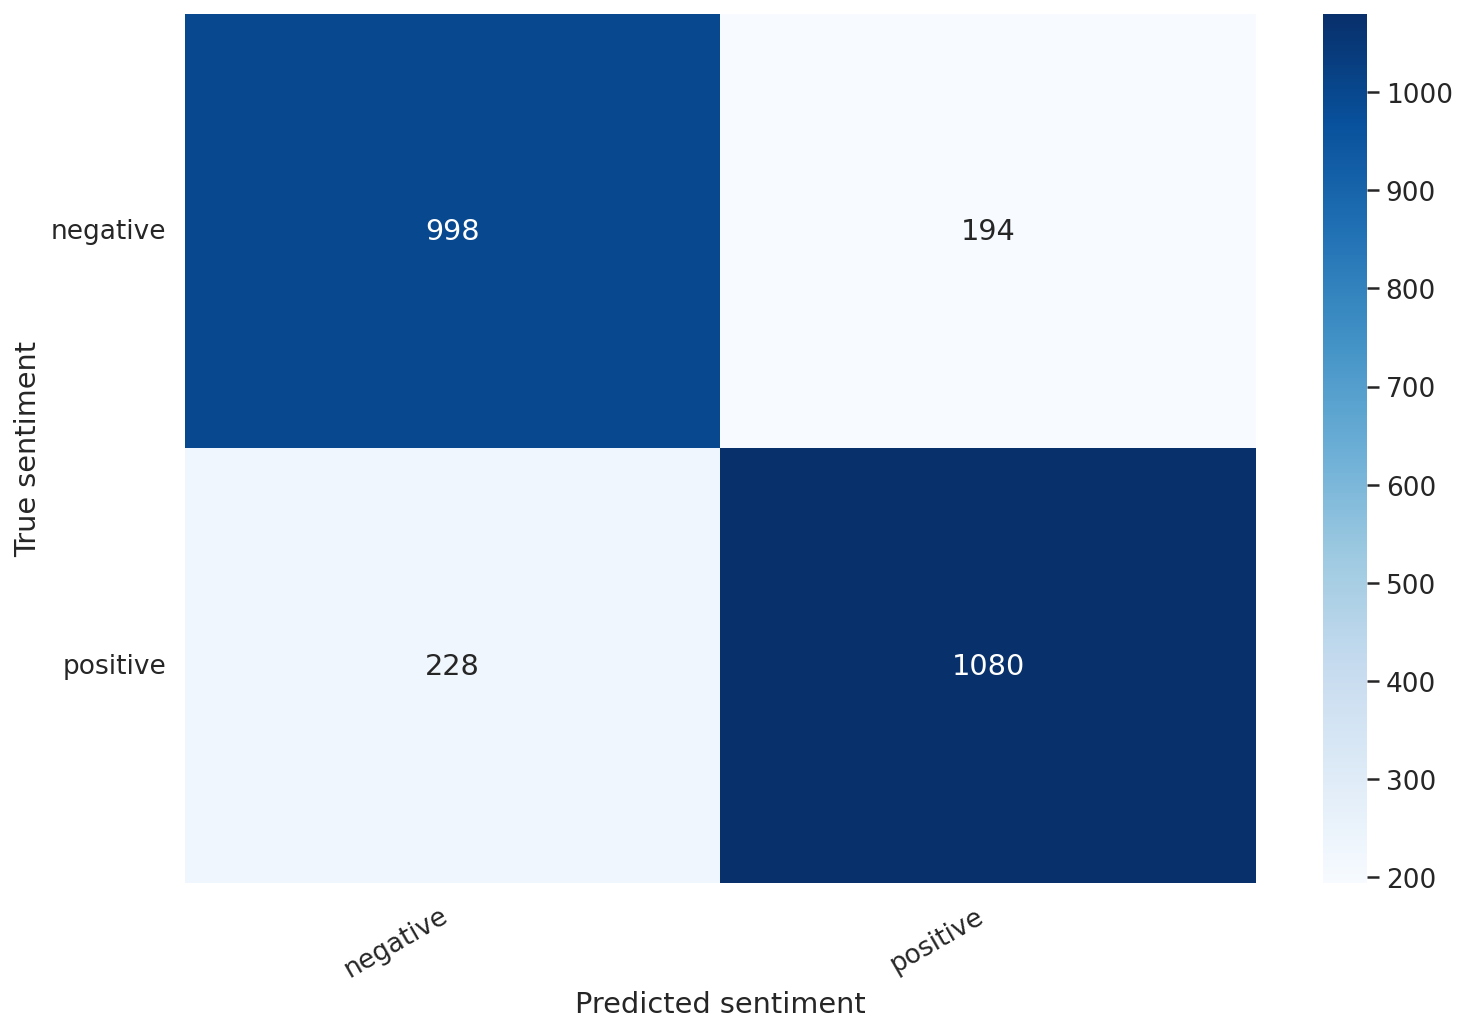

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
df_cm

,negative,positive
negative,998,194
positive,228,1080


Creating new dataframes with predicted values and original values

In [ ]:
pred_df = pd.DataFrame(y_tweets, columns = ['Tweet'])
pred_df_ogn = pd.DataFrame(y_tweets, columns = ['Tweet'])

In [ ]:
pred_df['Sentiment'] = y_pred
pred_df_ogn['Sentiment'] = y_test

In [ ]:
pred_df.tail()

,Tweet,Sentiment
2495,entity dude. wow now i kind of sort of wish...,0
2496,entity cry?,0
2497,another sunny day it seems! off to work a litt...,0
2498,entity i hav a friend in az i might go c - so ...,1
2499,entity thanks allan! they are photos from a jo...,1


In [ ]:
pred_df_ogn.tail()

,Tweet,Sentiment
2495,entity dude. wow now i kind of sort of wish...,1
2496,entity cry?,0
2497,another sunny day it seems! off to work a litt...,0
2498,entity i hav a friend in az i might go c - so ...,1
2499,entity thanks allan! they are photos from a jo...,1


In [ ]:
pred_df_positive = pred_df[pred_df.Sentiment==1]
pred_df_negative = pred_df[pred_df.Sentiment==0]
pred_df_positive_ogn = pred_df_ogn[pred_df_ogn.Sentiment==1]
pred_df_negative_ogn = pred_df_ogn[pred_df_ogn.Sentiment==0]

In [ ]:
print(pred_df_positive.shape)
print(pred_df_negative.shape)

(1274, 2)
(1226, 2)


In [ ]:
print(pred_df_positive_ogn.shape)
print(pred_df_negative_ogn.shape)

(1308, 2)
(1192, 2)


Positive wordcloud of predicted values

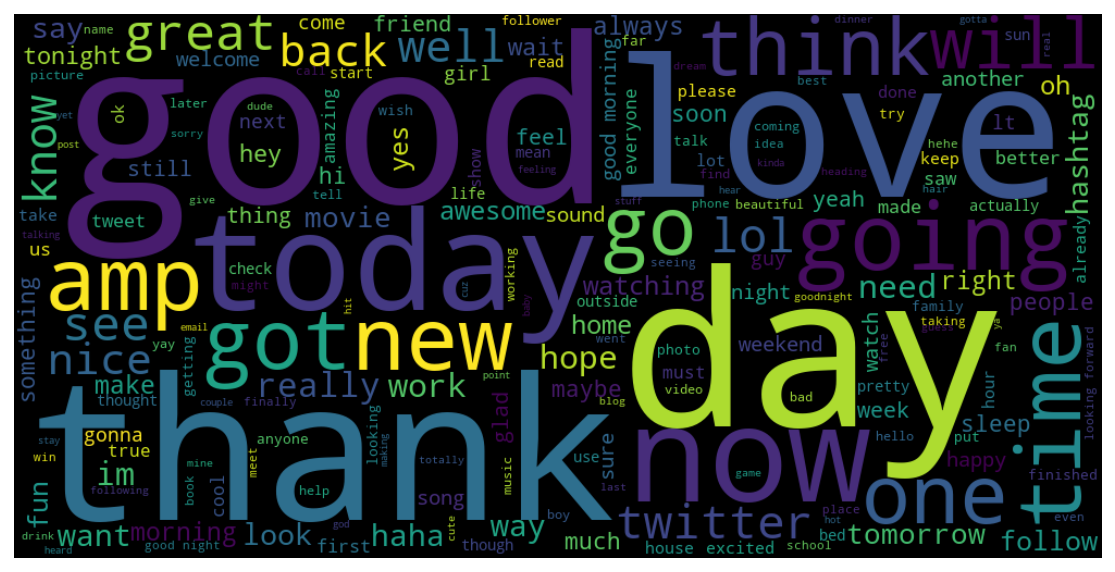

In [ ]:
from wordcloud import WordCloud, STOPWORDS
pwcp= (' '.join(pred_df_positive['Tweet']))
wordcloud = WordCloud(stopwords = stop_words, width = 1000, height = 500).generate(pwcp)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
display()

Positive wordcloud of real values

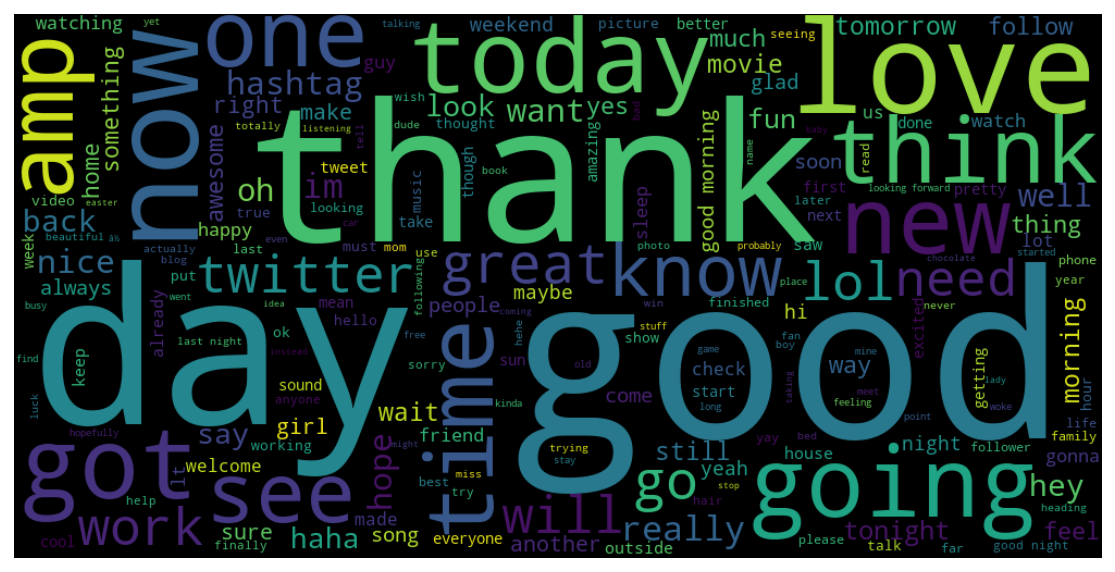

In [ ]:
from wordcloud import WordCloud, STOPWORDS
pwcp_o= (' '.join(pred_df_positive_ogn['Tweet']))
wordcloud = WordCloud(stopwords = stop_words,width = 1000, height = 500).generate(pwcp_o)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
display()

Negative word cloud of predicted values

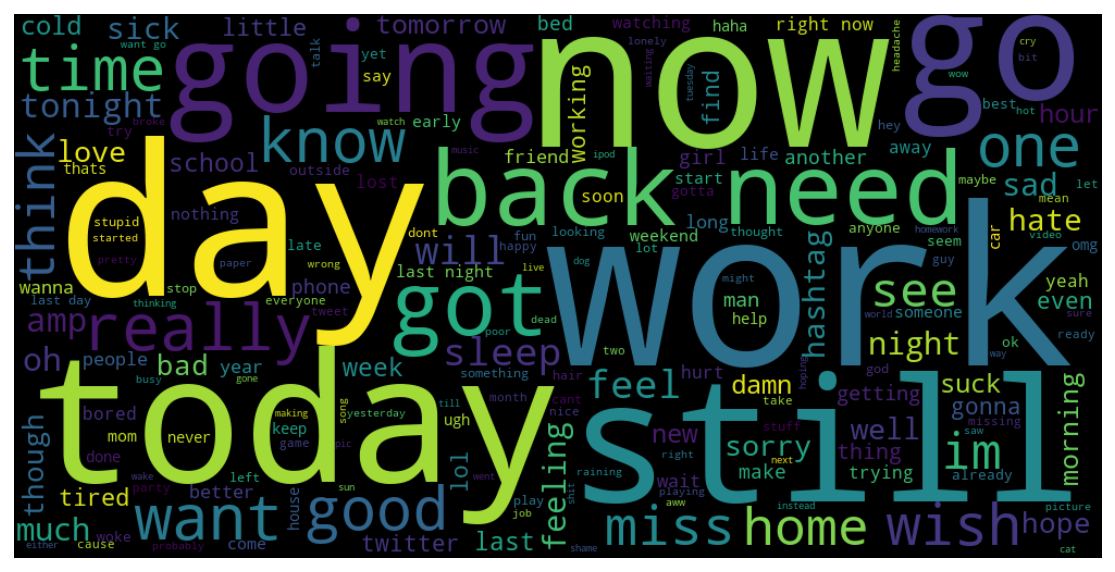

In [ ]:
from wordcloud import WordCloud, STOPWORDS
pwcn= (' '.join(pred_df_negative['Tweet']))
wordcloud = WordCloud(stopwords = stop_words,width = 1000, height = 500).generate(pwcn)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
display()

Negative wordcloud of real values


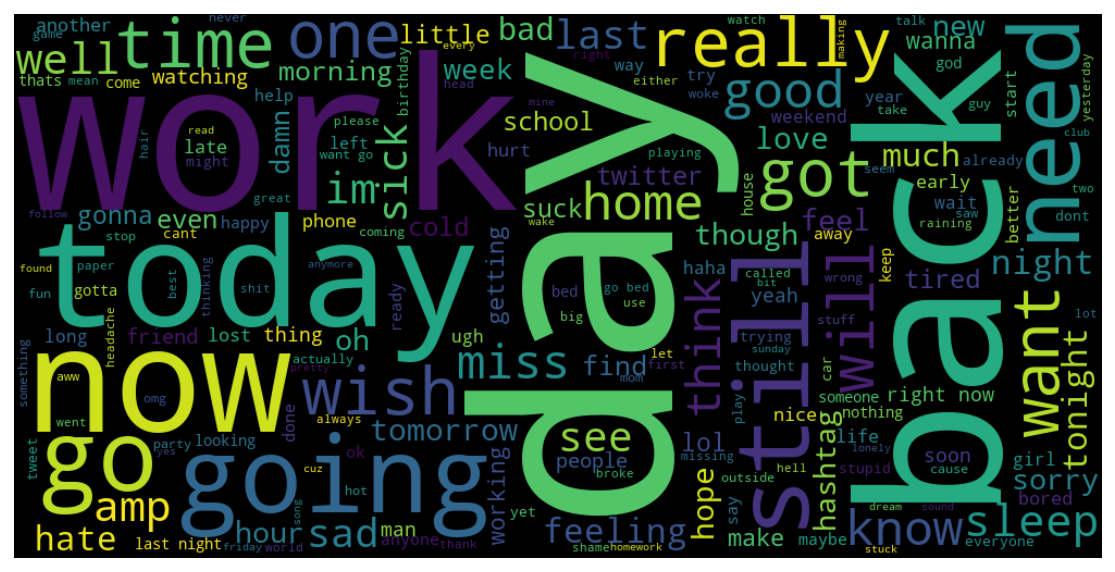

In [ ]:
from wordcloud import WordCloud, STOPWORDS
pwcn_o= (' '.join(pred_df_negative_ogn['Tweet']))
wordcloud = WordCloud(stopwords = stop_words,width = 1000, height = 500).generate(pwcn_o)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
display()

Predicting on the tweet that has never seen before

In [ ]:
tweet_new = df2.Tweet[45000]
tweet_new1 = df2.Tweet[90000]
tweet_new2 = "Hello world. It is a beautiful day"

In [ ]:
def get_encode(tweettext):
  encoded_tweet = tokenizer.encode_plus(
    tweettext,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
    )
  return encoded_tweet

In [ ]:
encoded_tweet = get_encode(tweet_new)
input_ids = encoded_tweet['input_ids'].to(device)
attention_mask = encoded_tweet['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Tweet: {tweet_new}')
print(f'Sentiment  : {class_names[prediction]}')

Tweet: @LadyFawkes Aw, that's not fun. 
Sentiment  : negative


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_tweet = get_encode(tweet_new1)
input_ids = encoded_tweet['input_ids'].to(device)
attention_mask = encoded_tweet['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Tweet: {tweet_new1}')
print(f'Sentiment  : {class_names[prediction]}')

Tweet: is researching the aerodynamics of bees... hmmm, interesting!!  Learning something new everyday is refreshing 
Sentiment  : positive


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_tweet = get_encode(tweet_new2)
input_ids = encoded_tweet['input_ids'].to(device)
attention_mask = encoded_tweet['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Tweet: {tweet_new2}')
print(f'Sentiment  : {class_names[prediction]}')

Tweet: Hello world. It is a beautiful day
Sentiment  : positive


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
